In [1]:
import pandas as pd

# Load the dataset
file_path = "Water Quality Prediction.csv"
df = pd.read_csv(file_path)


print(df.head())


   Index        pH      Iron   Nitrate    Chloride           Lead      Zinc  \
0      0  8.332988  0.000083  8.605777  122.799772   3.710000e-52  3.434827   
1      1  6.917863  0.000081  3.734167  227.029851   7.850000e-94  1.245317   
2      2  5.443762  0.020106  3.816994  230.995630   5.290000e-76  0.528280   
3      3  7.955339  0.143988  8.224944  178.129940  4.000000e-176  4.027879   
4      4  8.091909  0.002167  9.925788  186.540872  4.170000e-132  3.807511   

            Color  Turbidity  Fluoride  ...  Chlorine     Manganese  \
0       Colorless   0.022683  0.607283  ...  3.708178  2.270000e-15   
1    Faint Yellow   0.019007  0.622874  ...  3.292038  8.020000e-07   
2    Light Yellow   0.319956  0.423423  ...  3.560224  7.007989e-02   
3  Near Colorless   0.166319  0.208454  ...  3.516907  2.468295e-02   
4    Light Yellow   0.004867  0.222912  ...  3.177849  3.296139e-03   

   Total Dissolved Solids  Source  Water Temperature  Air Temperature  \
0              332.118789

In [2]:
print(df.columns)


Index(['Index', 'pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
       'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day',
       'Target'],
      dtype='object')


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = "Water Quality Prediction.csv"
df = pd.read_csv(file_path)

# Select one attribute (e.g., 'pH') and the target ('Target')
X = df[['pH']]  # Feature
y = df['Target']  # Target

# Impute missing values in the 'pH' column with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Training the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Making predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Output model coefficients and predictions
print("Coefficient:", reg.coef_)
print("Intercept:", reg.intercept_)
print("First 5 Training Predictions:", y_train_pred[:5])
print("First 5 Test Predictions:", y_test_pred[:5])


Coefficient: [-0.01600279]
Intercept: 0.3488546951607007
First 5 Training Predictions: [0.22596023 0.22963603 0.2504026  0.22414839 0.22453862]
First 5 Test Predictions: [0.2367584  0.21603441 0.21959816 0.22380901 0.24177898]


In [4]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Assuming the model has already been trained and predictions have been made:
# y_train_pred, y_test_pred from the previous linear regression model

# Calculate metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for the testing set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("Training Set Metrics:")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\nTesting Set Metrics:")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R²: {r2_test:.4f}")


Training Set Metrics:
MSE: 0.1767
RMSE: 0.4204
MAPE: 795879014565292.6250
R²: 0.0010

Testing Set Metrics:
MSE: 0.1765
RMSE: 0.4202
MAPE: 796102401930249.3750
R²: 0.0013


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Load the dataset
file_path = "Water Quality Prediction.csv"
df = pd.read_csv(file_path)

# Drop any non-numeric columns, except for the 'Target' column
X = df.drop(columns=['Target'])  # Select all attributes as features
y = df['Target']  # Target variable

# Convert all non-numeric columns to numeric (if needed) or drop them
X = pd.get_dummies(X, drop_first=True)

# Impute missing values in all features with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Training the linear regression model with multiple attributes
reg = LinearRegression().fit(X_train, y_train)

# Making predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Calculate metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for the testing set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("Training Set Metrics:")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\nTesting Set Metrics:")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"R²: {r2_test:.4f}")


Training Set Metrics:
MSE: 0.1294
RMSE: 0.3597
MAPE: 607298154568417.2500
R²: 0.2685

Testing Set Metrics:
MSE: 0.1293
RMSE: 0.3596
MAPE: 606811079594276.0000
R²: 0.2686


In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = "Water Quality Prediction.csv"
df = pd.read_csv(file_path)

# Drop the target variable and use only the features for clustering
X = df.drop(columns=['Target'])

# Convert all non-numeric columns to numeric (if needed) or drop them
X = pd.get_dummies(X, drop_first=True)

# Impute missing values in all features with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Perform K-Means clustering with k = 2
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(X_imputed)

# Output the cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Print the results
print("Cluster Labels:")
print(cluster_labels)

print("\nCluster Centers:")
print(cluster_centers)


Cluster Labels:
[1 1 1 ... 0 0 0]

Cluster Centers:
[[7.86185000e+05 7.45072101e+00 1.13827364e-01 6.08212265e+00
  1.81946972e+02 1.27318484e-03 1.53016975e+00 4.83449523e-01
  9.42161297e-01 4.94143241e-01 1.77309271e+00 1.44466616e+02
  4.24654513e+02 3.23712821e+00 9.41809957e-02 2.64856325e+02
  1.91320587e+01 6.00290561e+01 1.57221588e+01 1.14945837e+01
  1.78913409e-01 1.19351194e-01 3.10749859e-01 7.91990533e-02
  1.23128022e-01 1.23055610e-01 1.22531580e-01 1.23160416e-01
  1.22783114e-01 1.23453873e-01 1.24029353e-01 8.36466398e-02
  8.37381069e-02 7.54717700e-02 8.40868251e-02 8.36561676e-02
  8.12056123e-02 8.34675168e-02 8.37057123e-02 8.04929313e-02
  8.34446500e-02 8.04872146e-02]
 [2.61897500e+05 7.44901637e+00 1.14102056e-01 6.07503853e+00
  1.81784872e+02 1.31012059e-03 1.52768415e+00 4.83733728e-01
  9.39863860e-01 4.93745007e-01 1.77248330e+00 1.44735509e+02
  4.25020972e+02 3.23682806e+00 9.28743072e-02 2.64718005e+02
  1.91751818e+01 6.00359767e+01 1.57417859e+01 

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the dataset
file_path = "Water Quality Prediction.csv"
df = pd.read_csv(file_path)

# Drop the target variable and use only the features for clustering
X = df.drop(columns=['Target'])

# Convert all non-numeric columns to numeric (if needed) or drop them
X = pd.get_dummies(X, drop_first=True)



In [3]:
# Impute missing values in all features with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Perform K-Means clustering with k = 2
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
kmeans.fit(X_imputed)

# Calculate the evaluation metrics


KMeans(n_clusters=2, random_state=42)

In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Example Data: Replace this with your actual data
# For demonstration purposes, generating random data
np.random.seed(42)
X = np.random.rand(100, 5)  # Example data with 100 samples and 5 features

# Standardize the data (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans model (example with 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Compute cluster evaluation metrics
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
ch_score = calinski_harabasz_score(X_scaled, kmeans.labels_)
db_index = davies_bouldin_score(X_scaled, kmeans.labels_)

# Print the results
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Score:", ch_score)
print("Davies-Bouldin Index:", db_index)


Silhouette Score: 0.17404934432532465
Calinski-Harabasz Score: 22.10492530456608
Davies-Bouldin Index: 1.7577140175336121


C:\Users\saini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


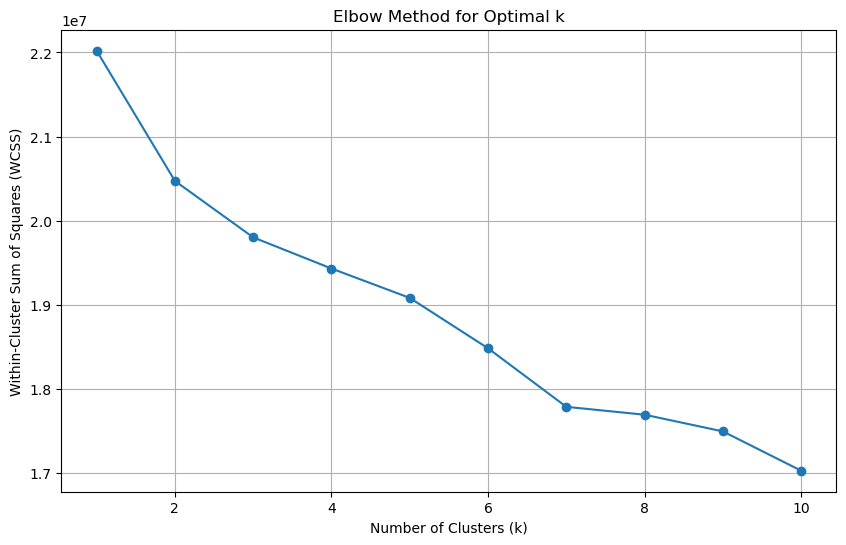

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = "Water Quality Prediction.csv"
df = pd.read_csv(file_path) # Update this path if the file is located elsewhere


# Select numerical columns for clustering, excluding index and non-numeric columns
numeric_columns = df.select_dtypes(include='number').columns
data_numeric = df[numeric_columns]

# Handle missing values by imputing with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed)

# Perform k-means clustering for different values of k and calculate the Within-Cluster Sum of Squares (WCSS)
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot WCSS against the number of clusters to find the optimal k using the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


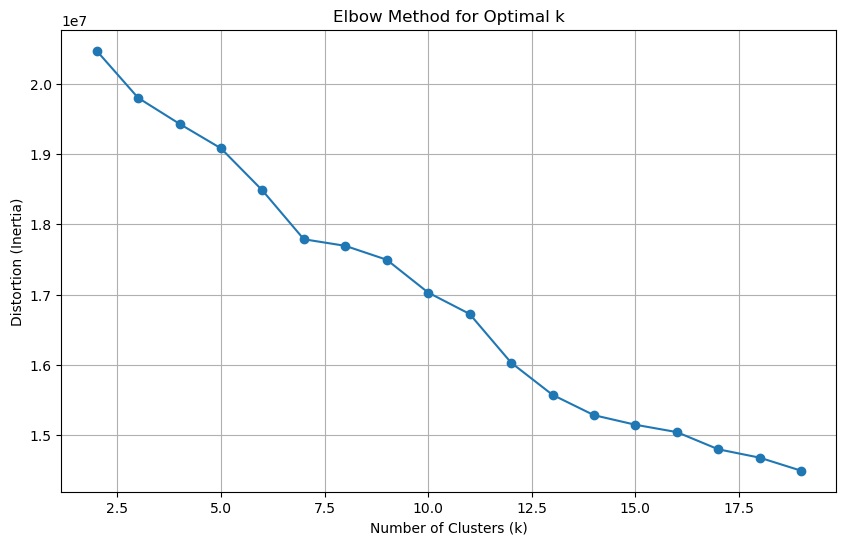

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

file_path = "Water Quality Prediction.csv"
df = pd.read_csv(file_path)

# Select numerical columns for clustering, excluding index and non-numeric columns
numeric_columns = df.select_dtypes(include='number').columns
data_numeric = df[numeric_columns]

# Handle missing values by imputing with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed)

# Initialize list to store distortion values (inertia)
distortions = []

# Compute distortions for different values of k
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_data)
    distortions.append(kmeans.inertia_)

# Plot the distortions to determine the optimal k using the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), distortions, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()
